# Taobao User Behaviour (Python)

## 1 - 项目简介

### 1.1 项目背景

UserBehavior是阿里巴巴提供的一个淘宝用户行为数据集，包含了2017年11月25日至2017年12月3日之间，有行为的约一百万随机用户的所有行为（行为包括点击、购买、加购、喜欢）。数据集的组织形式和MovieLens-20M类似，即数据集的每一行表示一条用户行为，由用户ID、商品ID、商品类目ID、行为类型和时间戳组成，并以逗号分隔。

数据集地址：[User Behavior Data from Taobao](https://tianchi.aliyun.com/dataset/dataDetail?dataId=649) 

<html>
<p><strong>关于数据集中每一列的详细描述如下：</strong></p>

<table align="left">

<thead>    
<tr>
    <th style="text-align:center">列名称</th>
    <th style="text-align:center">中文列名称</th>
    <th style="text-align:center">说明</th>
</tr>
</thead> 
    
<tbody>
<tr>
    <td style="text-align:left">user_id</td>
    <td style="text-align:left">用户ID</td>
    <td style="text-align:left">整数类型，序列化后的用户ID</td>
</tr>
<tr>
    <td style="text-align:left">item_id</td>
    <td style="text-align:left">商品ID</td>
    <td style="text-align:left">整数类型，序列化后的商品ID</td>
</tr>
<tr>
    <td style="text-align:left">category_id</td>
    <td style="text-align:left">商品类目ID</td>
    <td style="text-align:left">整数类型，序列化后的商品所属类目ID</td>
</tr>
<tr>
    <td style="text-align:left">behavior_type</td>
    <td style="text-align:left">行为类型</td>
    <td style="text-align:left">字符串，枚举类型，包括('pv', 'buy', 'cart', 'fav')</td>
</tr>
<tr>
    <td style="text-align:left">timestamp</td>
    <td style="text-align:left">时间戳</td>
    <td style="text-align:left">行为发生的时间戳</td>
</tr>
</tbody>
    
</table>
</html>

<html>
<p><strong>用户行为类型共有四种，它们分别是：</strong></p>

<table align="left">

<thead>
<tr> 
    <th style="text-align:center">行为类型</th>
    <th style="text-align:center">说明</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="text-align:left">pv</td>
    <td style="text-align:left">商品详情页pv，等价于点击</td>
</tr>
<tr>
    <td style="text-align:left">buy</td>
    <td style="text-align:left">商品购买</td>
</tr>
<tr>
    <td style="text-align:left">cart</td>
    <td style="text-align:left">将商品加入购物车</td>
</tr>
<tr>
    <td style="text-align:left">fav</td>
    <td style="text-align:left">收藏商品</td>
</tr>
</tbody>

</table>
</html>

### 1.2 分析目标

### 1.3 分析方法

- 流量指标
- 用户消费频次
- 用户行为在时间维度的分布
- 用户行为转化漏斗
- 用户留存率
- 商品销量

## 2 - 数据读入与检查

### 2.1 Python 库导入

In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']#黑体
sns.set_style('whitegrid') # 网格背景

%config InlineBackend.figure_format = 'retina' # retina 显示
%matplotlib inline

In [2]:
raw = pd.read_csv('Data/UserBehavior.csv',
                  names=['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp'])
raw.head()

,user_id,item_id,category_id,behavior_type,timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


### 2.2 数据概况

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   category_id    int64 
 3   behavior_type  object
 4   timestamp      int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ GB


In [4]:
for i in raw.columns:
    print(i, len(raw[i].unique()))

user_id 987994
item_id 4162024
category_id 9439
behavior_type 4
timestamp 815859


In [5]:
raw['behavior_type'].value_counts()

pv      89716264
cart     5530446
fav      2888258
buy      2015839
Name: behavior_type, dtype: int64

## 3 - 数据预处理

In [93]:
ub = raw.copy()

### 3.1 - 将timestamp转换为日期格式

In [94]:
# 从 timestamp 转化为 pandas 的 datetime 格式

stamp_to_date = lambda x: pd.Timestamp(x, unit='s', tz='Asia/Shanghai').date()
ub['ub_date'] = ub['timestamp'].apply(stamp_to_date)

In [95]:
stamp_to_datetime= lambda x: pd.Timestamp(x, unit='s', tz='Asia/Shanghai')
ub['ub_datetime'] = ub['timestamp'].apply(stamp_to_datetime)

### 3.2 - 保留特定时间段的数据

In [96]:
ub = ub[(ub['ub_date'] >= pd.to_datetime('2017-11-25')) & (ub['ub_date'] <= pd.to_datetime('2017-12-03'))]

In [97]:
ub['ub_date'].value_counts()

2017-12-02    13777869
2017-12-03    13662159
2017-12-01    10859436
2017-11-26    10664602
2017-11-30    10447740
2017-11-25    10420015
2017-11-29    10284073
2017-11-27    10101147
2017-11-28     9878190
Name: ub_date, dtype: int64

In [123]:
ub.head()

,user_id,item_id,category_id,behavior_type,timestamp,ub_date,ub_datetime
0,1,2268318,2520377,pv,1511544070,2017-11-25,2017-11-25 01:21:10+08:00
1,1,2333346,2520771,pv,1511561733,2017-11-25,2017-11-25 06:15:33+08:00
2,1,2576651,149192,pv,1511572885,2017-11-25,2017-11-25 09:21:25+08:00
3,1,3830808,4181361,pv,1511593493,2017-11-25,2017-11-25 15:04:53+08:00
4,1,4365585,2520377,pv,1511596146,2017-11-25,2017-11-25 15:49:06+08:00


### 3.3 存储处理过的数据

In [101]:
# ub.to_csv('Data/ub_cleaned.csv', index=False, encoding='utf-8-sig')

In [2]:
ub = pd.read_csv("Data/ub_cleaned.csv")

# 预留

In [ ]:
# ub[ub['item_id'].isin(ub[ub['behavior_type']=='buy']['item_id'].unique())].groupby('item_id')['behavior_type'].value_counts().unstack(fill_value=0).sort_values(by='pv', ascending=False)

In [ ]:
# ub[ub['category_id'].isin(ub[ub['behavior_type']=='buy']['category_id'].unique())].groupby('category_id')['behavior_type'].value_counts().unstack(fill_value=0).sort_values(by='buy', ascending=False)

## 4 - 用户数据指标

### 消费次数前 10 的客户

In [28]:
user_buy_top10 = ub[ub['behavior_type']=='buy'].groupby('user_id')['behavior_type'].count().sort_values(ascending=False)[:10]
pd.DataFrame({'buy_frequency': user_buy_top10}, index=user_buy_top10.index)

,buy_frequency
user_id,
486458,262
866670,177
702034,159
107013,131
1014116,118
432739,112
500355,110
537150,109
1003412,100


## 5 - 行为数据指标

### 5.1 - 流量指标分析

- 总访问量 (PV)
- 总访客数 (UV)
- 消费用户数 (user_pay)
- 日均访问量 (pv_per_day)
- 人均访问量 (pv_per_user) : PV/UV
- 消费用户数占比 (user_pay_rate) user_pay/UV

In [5]:
pv = len(ub['user_id'])
uv = ub['user_id'].nunique()
user_pay = ub[ub['behavior_type'] == 'buy']['user_id'].nunique()
pv_per_day = round(pv/ub['ub_date'].nunique(), 2)
pv_per_user = round(pv/uv, 2)
user_pay_rate = round(user_pay/uv, 2)

In [6]:
metrics = ["总访问量 (PV)", "总访客数 (UV)", "消费用户数 (user_pay)",
 "日均访问量 (pv_per_day)", "人均访问量 (pv_per_user)", "消费用户数占比 (user_pay_rate)"]

metrics_val = [pv, uv, user_pay, pv_per_day, pv_per_user, user_pay_rate]

pd.DataFrame({'Value': metrics_val}, index=metrics)

,Value
总访问量 (PV),1.000952e+08
总访客数 (UV),9.879910e+05
消费用户数 (user_pay),6.724040e+05
日均访问量 (pv_per_day),1.112169e+07
人均访问量 (pv_per_user),1.013100e+02
消费用户数占比 (user_pay_rate),6.800000e-01


In [7]:
# 跳失率

sum(ub.groupby('user_id')['behavior_type'].count() == 1)/ub['user_id'].nunique()

8.906963727402375e-05

## 5 - 消费频次

### 5.2 复购率

In [33]:
rebuy_user = sum(ub[ub['behavior_type']=='buy'].groupby('user_id')['behavior_type'].count().apply(lambda x: 1 if x>=2 else 0))

In [34]:
all_buy_user = ub[ub['behavior_type']=='buy']['user_id'].nunique()

In [36]:
rebuy_rate = round(rebuy_user/all_buy_user, 4)
print("复购率为：", rebuy_rate)

复购率为： 0.6601


## 6 - 用户行为在时间维度的分布

### 6.1 日活跃人数 (DAU)

In [3]:
DAU = ub.groupby('ub_date')['user_id'].nunique()
behavior_count = ub.groupby('ub_date')['user_id'].count()
user_pv = ub[ub['behavior_type']=='pv'].groupby('ub_date')['user_id'].count()
user_fav = ub[ub['behavior_type']=='fav'].groupby('ub_date')['user_id'].count()
user_cart = ub[ub['behavior_type']=='cart'].groupby('ub_date')['user_id'].count()
user_buy = ub[ub['behavior_type']=='buy'].groupby('ub_date')['user_id'].count()

In [4]:
active_metric = pd.DataFrame({'DAU': DAU,
                              'behavior_count': behavior_count,
                              'user_pv': user_pv,
                              'user_fav': user_fav,
                              'user_cart': user_cart,
                              'user_buy': user_buy})
active_metric

,DAU,behavior_count,user_pv,user_fav,user_cart,user_buy
ub_date,,,,,,
2017-11-25,706641,10420015,9353423,302071,563376,201145
2017-11-26,715516,10664602,9567423,308954,582581,205644
2017-11-27,710094,10101147,9041187,291221,541904,226835
2017-11-28,709257,9878190,8842933,289100,534157,212000
2017-11-29,718922,10284073,9210821,298587,551593,223072
2017-11-30,730597,10447740,9358998,302264,565015,221463
2017-12-01,740139,10859436,9718959,307115,623346,210016
2017-12-02,970401,13777869,12329644,396749,793569,257907
2017-12-03,966977,13662159,12237300,392197,774905,257757


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0, flags=flags)


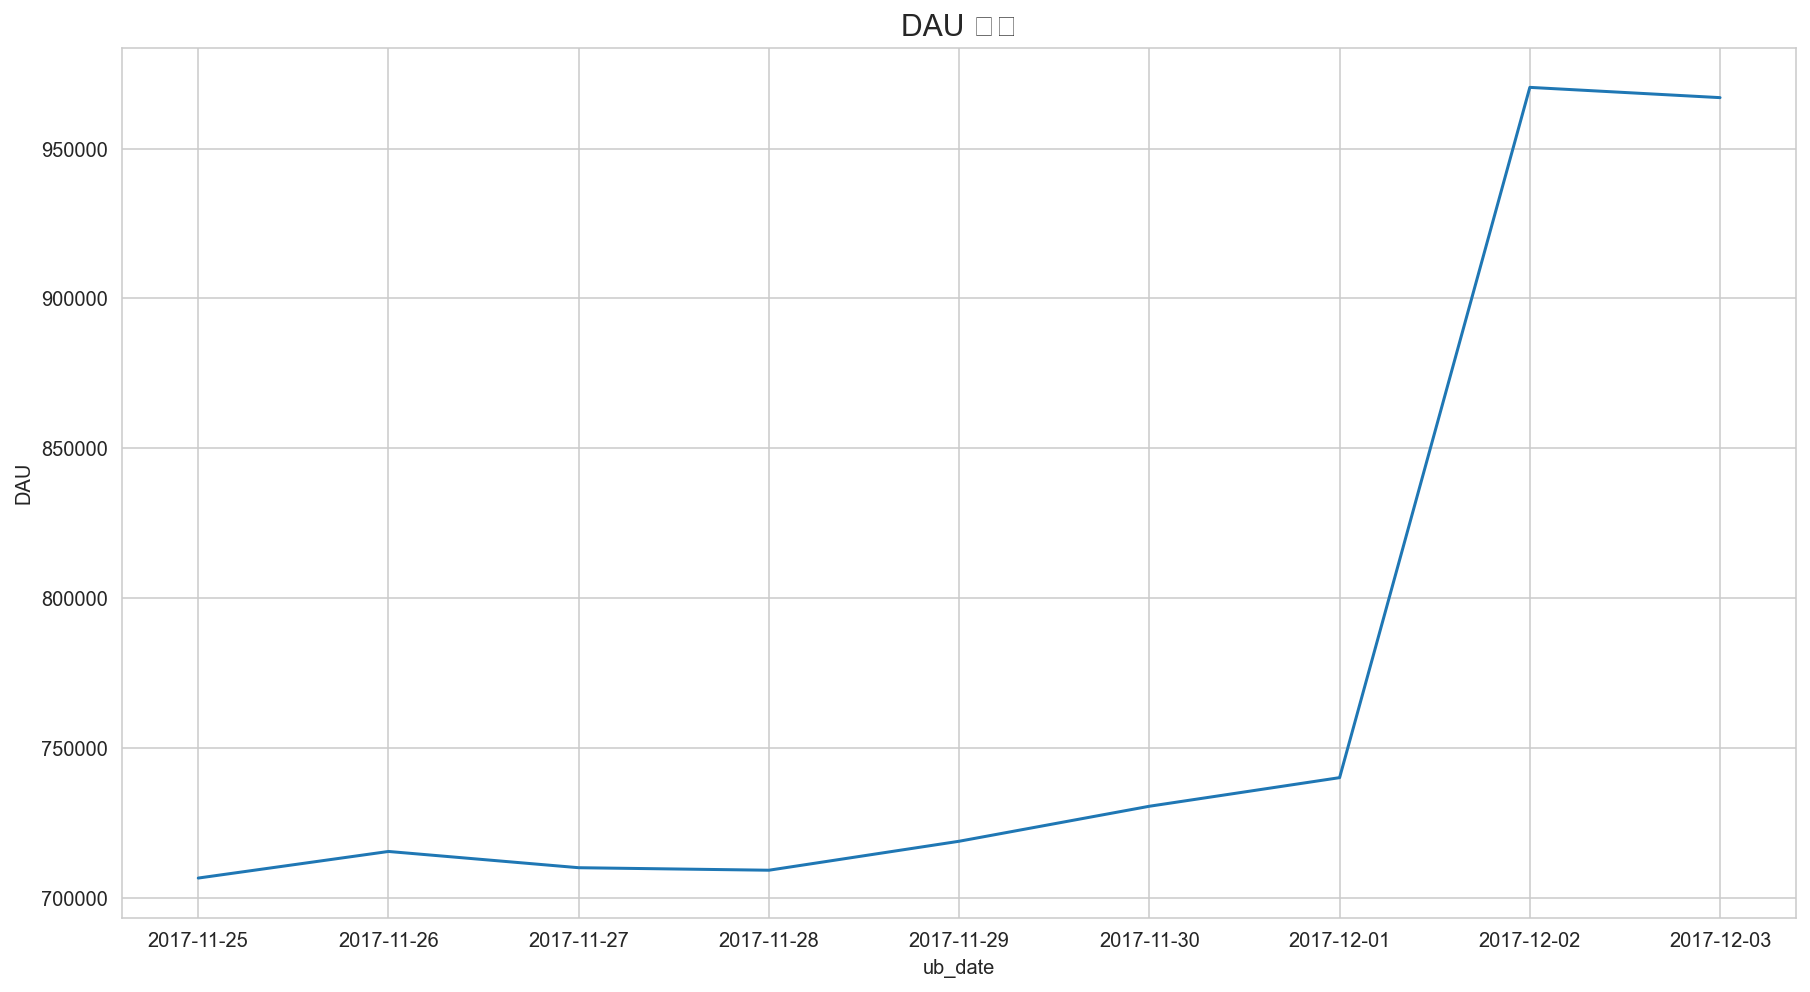

In [5]:
plt.figure(figsize=(15,8))
sns.lineplot(data=active_metric['DAU'])
plt.title('DAU 分布', fontsize=15)

plt.show()